## Import Packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
import datetime
from dateutil.relativedelta import relativedelta
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gspread


ModuleNotFoundError: No module named 'gspread'

## Import Data

In [14]:
data = pd.read_csv('https://github.com/TrongGia/Data-Mining/blob/main/hotel_bookings_demand.csv?raw=true')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [15]:
data.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [16]:
data['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [17]:
(data.is_canceled.value_counts())

0    75166
1    44224
Name: is_canceled, dtype: int64

In [18]:
x=data['is_canceled']==1
data_check=data.loc[x,['reservation_status','is_canceled']]
y=data_check['reservation_status']=='Check-Out'
data_check.loc[y,:]

,reservation_status,is_canceled


In [19]:
x=data['is_canceled']==0
data_check=data.loc[x,['reservation_status','is_canceled']]
y=data_check['reservation_status']=='Canceled'
data_check.loc[y,:]

,reservation_status,is_canceled


In [20]:
x=data['is_canceled']==0
data_check=data.loc[x,['reservation_status','is_canceled']]
y=data_check['reservation_status']=='No-Show' 
data_check.loc[y,:] # suy ra duoc là duoc coi là cancel(1) neu cancel va no-show, con check-out la (0) 

,reservation_status,is_canceled


In [21]:
(data.lead_time.value_counts().sort_index())

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
622      17
626      30
629      17
709       1
737       1
Name: lead_time, Length: 479, dtype: int64

<AxesSubplot:ylabel='lead_time'>

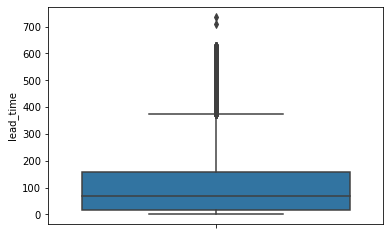

In [22]:
data['lead_time'].describe()
sns.boxplot(y='lead_time',data=data) #việc đặt trước cá  năm không hẳn là outlier bởi vì có quá nhiều điểm đen)

In [23]:
x = data['lead_time']>=400
data.loc[x,['lead_time','arrival_date_year','reservation_status_date','is_canceled','arrival_date_month','arrival_date_day_of_month']]

,lead_time,arrival_date_year,reservation_status_date,is_canceled,arrival_date_month,arrival_date_day_of_month
1,737,2015,2015-07-01,0,July,1
890,460,2015,2015-08-10,0,August,3
4182,709,2016,2016-03-24,0,February,25
5704,468,2016,2016-03-04,1,May,12
5705,468,2016,2016-03-04,1,May,12
...,...,...,...,...,...,...
119102,518,2017,2017-08-29,0,August,26
119107,518,2017,2017-08-29,0,August,26
119109,518,2017,2017-08-29,0,August,26
119111,518,2017,2017-08-29,0,August,26


In [24]:
(data.arrival_date_year.value_counts())

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [25]:
(data.arrival_date_month.value_counts())

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [26]:
data['arrival_date_week_number'].describe()


count    119390.000000
mean         27.165173
std          13.605138
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          53.000000
Name: arrival_date_week_number, dtype: float64

In [27]:
x=data['arrival_date_week_number']==53
data.loc[x,:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3622,Resort Hotel,0,62,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,33.26,0,0,Check-Out,2015-12-29
3623,Resort Hotel,1,31,2015,December,53,27,2,0,1,...,No Deposit,250.0,NaN,0,Transient,80.00,0,0,No-Show,2015-12-27
3624,Resort Hotel,0,62,2015,December,53,27,2,0,2,...,No Deposit,241.0,NaN,0,Transient,39.26,1,1,Check-Out,2015-12-29
3625,Resort Hotel,1,27,2015,December,53,27,2,2,2,...,No Deposit,250.0,NaN,0,Transient,75.00,0,1,Canceled,2015-12-22
3626,Resort Hotel,1,83,2015,December,53,27,2,3,2,...,No Deposit,240.0,NaN,0,Transient,71.28,0,0,Canceled,2015-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104142,City Hotel,0,17,2016,December,53,30,2,5,2,...,No Deposit,9.0,NaN,0,Transient,90.34,0,1,Check-Out,2017-01-06
104145,City Hotel,0,177,2016,December,53,30,2,5,0,...,No Deposit,NaN,NaN,0,Transient,1.29,0,2,Check-Out,2017-01-06
104147,City Hotel,0,107,2016,December,53,31,2,5,2,...,No Deposit,28.0,NaN,0,Transient,103.57,0,0,Check-Out,2017-01-07
104216,City Hotel,0,310,2016,December,53,27,2,10,2,...,No Deposit,9.0,NaN,0,Transient-Party,68.57,0,2,Check-Out,2017-01-08


In [28]:
data['arrival_date_day_of_month'].describe()


count    119390.000000
mean         15.798241
std           8.780829
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: arrival_date_day_of_month, dtype: float64

In [29]:
data['stays_in_weekend_nights'].describe()
data['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [30]:

x=data['stays_in_weekend_nights']>10
data.loc[x,:] #check xem thử họ ở nhiều ngày thì ngày checkout với arrive có hợp lí hay không

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,NaN,0,Transient,0.00,0,1,Check-Out,2015-10-23
3820,Resort Hotel,1,122,2016,January,3,12,12,30,2,...,No Deposit,8.0,NaN,0,Transient,22.11,0,0,Canceled,2015-12-04
3850,Resort Hotel,0,214,2016,January,5,26,12,30,2,...,No Deposit,8.0,NaN,0,Transient,31.45,0,0,Check-Out,2016-03-08
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,...,No Deposit,8.0,NaN,0,Transient,25.50,0,0,Canceled,2016-10-31
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,...,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,...,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
32589,Resort Hotel,0,1,2017,February,5,3,13,32,1,...,No Deposit,NaN,NaN,0,Transient,42.11,0,3,Check-Out,2017-03-20
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,...,No Deposit,196.0,NaN,0,Transient,28.79,0,0,Check-Out,2017-03-07
34614,Resort Hotel,0,242,2017,February,7,17,12,30,2,...,No Deposit,75.0,NaN,0,Transient,35.70,0,1,Check-Out,2017-03-31
34898,Resort Hotel,0,150,2017,February,9,26,12,30,2,...,No Deposit,40.0,NaN,0,Contract,39.41,0,2,Check-Out,2017-04-09


In [31]:
data['stays_in_week_nights'].describe()
data['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: stays_in_week_nights, dtype: int64

In [32]:
x=data['stays_in_week_nights']>30
data.loc[x,:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,NaN,0,Transient,0.00,0,1,Check-Out,2015-10-23
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,...,No Deposit,8.0,NaN,0,Transient,25.50,0,0,Canceled,2016-10-31
14037,Resort Hotel,0,113,2015,August,31,1,18,42,1,...,No Deposit,NaN,NaN,0,Transient,110.50,0,3,Check-Out,2015-09-30
14038,Resort Hotel,0,126,2016,July,28,5,19,50,1,...,No Deposit,NaN,NaN,0,Transient,110.00,0,3,Check-Out,2016-09-12
32589,Resort Hotel,0,1,2017,February,5,3,13,32,1,...,No Deposit,NaN,NaN,0,Transient,42.11,0,3,Check-Out,2017-03-20
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,...,No Deposit,196.0,NaN,0,Transient,28.79,0,0,Check-Out,2017-03-07
54704,City Hotel,0,206,2016,July,30,23,14,34,2,...,No Deposit,9.0,NaN,0,Transient-Party,0.00,0,1,Check-Out,2016-09-09
88017,City Hotel,0,16,2016,March,11,11,14,35,0,...,No Deposit,NaN,215.0,0,Transient-Party,0.00,0,0,Check-Out,2016-04-29
101794,City Hotel,0,140,2016,September,39,22,16,41,0,...,No Deposit,9.0,NaN,0,Transient,8.34,0,2,Check-Out,2016-11-18


In [33]:
(data.adults.value_counts())

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [34]:
x=data['adults']==0
data.loc[x,['is_canceled','reservation_status','adults','children','babies']] #co the la ho khong dien thong tin

,is_canceled,reservation_status,adults,children,babies
2224,0,Check-Out,0,0.0,0
2409,0,Check-Out,0,0.0,0
3181,0,Check-Out,0,0.0,0
3684,0,Check-Out,0,0.0,0
3708,0,Check-Out,0,0.0,0
...,...,...,...,...,...
117204,0,Check-Out,0,2.0,0
117274,0,Check-Out,0,2.0,0
117303,0,Check-Out,0,2.0,0
117453,0,Check-Out,0,2.0,0


In [35]:
data.adults.describe()

count    119390.000000
mean          1.856403
std           0.579261
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [36]:
data.adults.mode()

0    2
Name: adults, dtype: int64

In [37]:
x=data['children'].isnull()

In [38]:
data['children'].isnull().value_counts()

False    119386
True          4
Name: children, dtype: int64

In [39]:
data.children.describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [40]:
data.loc[x,['is_canceled','reservation_status','adults','children','babies']] #fill missing value

,is_canceled,reservation_status,adults,children,babies
40600,1,Canceled,2,NaN,0
40667,1,Canceled,2,NaN,0
40679,1,Canceled,3,NaN,0
41160,1,Canceled,2,NaN,0


In [41]:
(data.children.value_counts())

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [42]:
x=data['children']==10
data.loc[x,['is_canceled','reservation_status','adults','children','babies']]

,is_canceled,reservation_status,adults,children,babies
328,1,No-Show,2,10.0,0


In [43]:
(data.babies.value_counts())


0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [44]:
x=data['babies']>=9
data.loc[x,['is_canceled','reservation_status','adults','children','babies']] #hoi bat hop li,

,is_canceled,reservation_status,adults,children,babies
46619,0,Check-Out,2,0.0,10
78656,0,Check-Out,1,0.0,9


In [45]:
data.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [46]:
data[['country']].isnull().value_counts()

country
False      118902
True          488
dtype: int64

In [47]:
data['country'].value_counts().sort_values(ascending=False) #fill missing value băng mode

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
NCL        1
SDN        1
KIR        1
NAM        1
Name: country, Length: 177, dtype: int64

In [48]:
data.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [49]:
data.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [50]:
data.is_repeated_guest.value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [51]:
data.previous_cancellations.value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [52]:
x=data['previous_cancellations']>=20
data.loc[x,:]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14779,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14780,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14781,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14782,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
14783,Resort Hotel,1,275,2015,October,41,4,2,0,2,...,Non Refund,208.0,NaN,0,Transient,50.0,0,0,Canceled,2015-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15171,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15172,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17
15173,Resort Hotel,1,244,2015,September,36,2,2,5,2,...,No Deposit,96.0,NaN,0,Transient-Party,8.0,0,0,Canceled,2015-06-17


In [53]:
data.previous_bookings_not_canceled.value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [54]:
data.reserved_room_type.value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [55]:
x=data['reserved_room_type']=='L'
data.loc[x,['reserved_room_type','assigned_room_type']] #hêt phong nên đợc chỉ định khác phòng

,reserved_room_type,assigned_room_type
354,L,H
504,L,C
911,L,F
14381,L,L
14570,L,A
15855,L,B


In [56]:
data.assigned_room_type.value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [57]:
data.booking_changes.value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: booking_changes, dtype: int64

In [58]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [87]:
data.agent.isnull().value_counts() #filling missing value = mode
data.agent.mean()

86.69338185346919

In [86]:
data.agent.value_counts().sort_values(ascending=False)

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
291.0        1
483.0        1
197.0        1
433.0        1
304.0        1
Name: agent, Length: 333, dtype: int64

In [88]:
data.agent.unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

<AxesSubplot:ylabel='agent'>

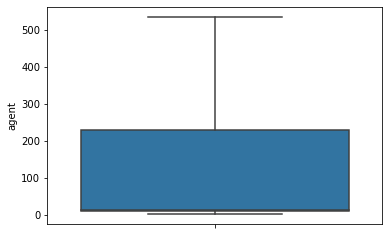

In [85]:
data.agent.value_counts().sort_values(ascending=False)
sns.boxplot(y='agent',data=data)

In [61]:
data.company.isnull().value_counts() #filling missing value

True     112593
False      6797
Name: company, dtype: int64

In [62]:
data.company.describe() #filling missing value

count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64

In [63]:
data.company.value_counts().sort_values(ascending=False)


40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
77.0       1
489.0      1
229.0      1
481.0      1
386.0      1
Name: company, Length: 352, dtype: int64

In [64]:
data.days_in_waiting_list.value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [65]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [66]:
data.adr.value_counts().sort_index(ascending=False) #maybe có outlier


 5400.00       1
 510.00        1
 508.00        1
 451.50        1
 450.00        1
            ... 
 1.00         15
 0.50          1
 0.26          1
 0.00       1959
-6.38          1
Name: adr, Length: 8879, dtype: int64

In [67]:
x=data['adr']==5400.00
data.loc[x,['is_canceled','adr']]

,is_canceled,adr
48515,1,5400.0


<AxesSubplot:ylabel='adr'>

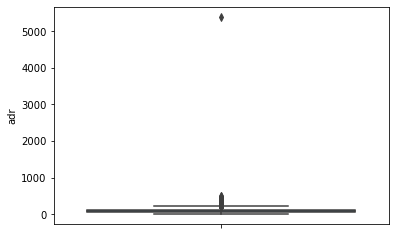

In [68]:
sns.boxplot(y='adr',data=data)

In [69]:
x=data['adr']>=400
data.loc[x,'adr'].sort_values(ascending=False)

48515     5400.00
111403     510.00
15083      508.00
103912     451.50
13142      450.00
13391      437.00
39155      426.25
39568      402.00
Name: adr, dtype: float64

In [70]:
data.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [71]:
x=data['required_car_parking_spaces']>=3
data.loc[x,['required_car_parking_spaces','adults','children','babies']]

,required_car_parking_spaces,adults,children,babies
29045,8,2,0.0,0
29046,8,2,0.0,0
38117,3,2,0.0,0
102762,3,1,0.0,0
110812,3,2,0.0,0


,required_car_parking_spaces,is_canceled
29045,8,0
29046,8,0
38117,3,0
102762,3,0
110812,3,0


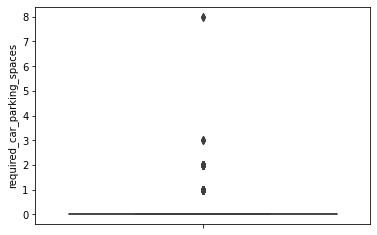

In [72]:
sns.boxplot(y='required_car_parking_spaces',data=data)
data.loc[data['required_car_parking_spaces']>=3,['required_car_parking_spaces','is_canceled']]

In [73]:
data.total_of_special_requests.value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [74]:
data.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

##### fix problem

In [75]:
x=data['adults']==0
y=data['children']==0
data.loc[x&y,['adults','children']]



,adults,children
2224,0,0.0
2409,0,0.0
3181,0,0.0
3684,0,0.0
3708,0,0.0
...,...,...
115029,0,0.0
115091,0,0.0
116251,0,0.0
116534,0,0.0


In [76]:
index_=data.loc[x&y,['adults','children']].index
index_

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            112558, 113188, 114583, 114908, 114911, 115029, 115091, 116251,
            116534, 117087],
           dtype='int64', length=180)

In [77]:
data.loc[index_,'adults']=2
data.loc[index_,'adults']

2224      2
2409      2
3181      2
3684      2
3708      2
         ..
115029    2
115091    2
116251    2
116534    2
117087    2
Name: adults, Length: 180, dtype: int64

In [78]:
data['children'].isnull().value_counts()

False    119386
True          4
Name: children, dtype: int64

In [79]:
data['children']=data['children'].fillna(0)
data['children'].isna().value_counts()

False    119390
Name: children, dtype: int64

In [80]:
x=data['babies']>=9
index_=data.loc[x,'babies'].index

In [81]:
data.loc[index_,'babies']=0
data['babies'].describe()

count    119390.000000
mean          0.007790
std           0.089332
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: babies, dtype: float64

In [82]:
data['country'].mode()

0    PRT
Name: country, dtype: object

In [83]:
data['company']=data['company'].fillna(0)
data['company'].describe()

count    119390.000000
mean         10.775157
std          53.943884
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         543.000000
Name: company, dtype: float64

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [80]:
data['country']=data['country'].fillna('PRT')
data['country'].isna().value_counts()

False    119390
Name: country, dtype: int64

In [81]:
data['agent'].describe()

count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

In [82]:
data['agent'].mean()

86.69338185346919

In [83]:
data['agent']=data['agent'].fillna(0)

In [84]:
data['agent'].describe()

count    119390.000000
mean         74.828319
std         107.141953
min           0.000000
25%           7.000000
50%           9.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

In [85]:
data['agent'].isnull().value_counts()



False    119390
Name: agent, dtype: int64

In [86]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [87]:
cols=["arrival_date_year","arrival_date_month","arrival_date_day_of_month"]
data['arrival_date'] = data[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data['arrival_date']=pd.to_datetime(data['arrival_date'])
data['reservation_status_datee']=pd.to_datetime(data['reservation_status_date'])
data



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_status_datee
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2017-09-07


In [88]:
#x=data.loc[data['arrival_date'] = data['reservation_status_date'],'reservation_status']=='Check'
#x.value_counts() c

In [89]:
#x=data['reservation_status']=='Canceled'
#data.loc[x,'reservation_status_date']>data['arrival_date']

In [90]:
 x=data.loc[data['arrival_date'] > data['reservation_status_date'],'reservation_status']=='Check-Out'
x.value_counts() #chứng tỏ ngày khách check out luôn lớn hơn hoặc bằng ngày khách đến

False    42137
Name: reservation_status, dtype: int64

In [91]:
y=data.loc[data['arrival_date'] == data['reservation_status_date'],'reservation_status']=='Check-Out'
y.value_counts() #chứng tỏ ngày khách check out luôn lớn hơn hoặc bằng ngày khách đến => hơp lí

False    2087
True      706
Name: reservation_status, dtype: int64

In [92]:
 x=data.loc[data['arrival_date'] < data['reservation_status_date'],'reservation_status']=='Canceled'
x.value_counts() #chứng tỏ ngày khách hủy luôn  nhỏ hơn  ngày khách đến

False    74460
Name: reservation_status, dtype: int64

In [93]:
y=data.loc[data['arrival_date'] == data['reservation_status_date'],'reservation_status']=='Canceled'
y.value_counts() #chứng tỏ ngày khách hủy luôn nhỏ hơn hoặc bằng ngày khách đến => hơp lí

False    1912
True      881
Name: reservation_status, dtype: int64

In [94]:
x=data.loc[data['arrival_date'] > data['reservation_status_date'],'reservation_status']=='No-Show'
x.value_counts() #chứng tỏ ngày khách hủy luôn  nhỏ hơn  ngày khách đến

False    42136
True         1
Name: reservation_status, dtype: int64

In [95]:
data3 = data.loc[data['arrival_date'] < data['reservation_status_date']]
data3 = data3[data3['reservation_status'] == 'Canceled']
data3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_status_datee


In [96]:
data['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [97]:
data4 = data.loc[data['arrival_date'] > data['reservation_status_date']]
data4[data4['reservation_status'] == 'No-Show']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_status_datee
7035,Resort Hotel,1,181,2016,July,30,17,2,5,2,...,0.0,0,Transient,152.86,0,1,No-Show,2016-03-28,2016-07-17,2016-03-28


In [98]:
data=data.drop([7035])

In [99]:
data['arrival_date_month'] = pd.to_datetime(data.arrival_date_month, format='%B').dt.month.astype(int)


In [100]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,reservation_status_datee
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2017-09-06
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,2017-09-07
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2017-09-07
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2017-09-07


In [101]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,...,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.010772,2016.156555,6.552480,27.165149,15.798231,0.927590,2.500281,1.859418,0.103887,...,0.031912,0.087119,0.137098,0.221126,74.826935,10.775247,2.321169,101.830694,0.062518,0.571359
std,0.482917,106.863312,0.707479,3.090631,13.605193,8.780866,0.998613,1.908280,0.574780,0.398557,...,0.175768,0.844340,1.497443,0.652308,107.141335,53.944101,17.594793,50.535786,0.245292,0.792801
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [102]:
#####Feature engineering



In [103]:
data["No."] = data.index + 1
data['total_nights']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data['total_people']=data['adults']+data['children']+data['babies']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119389 non-null  object        
 1   is_canceled                     119389 non-null  int64         
 2   lead_time                       119389 non-null  int64         
 3   arrival_date_year               119389 non-null  int64         
 4   arrival_date_month              119389 non-null  int64         
 5   arrival_date_week_number        119389 non-null  int64         
 6   arrival_date_day_of_month       119389 non-null  int64         
 7   stays_in_weekend_nights         119389 non-null  int64         
 8   stays_in_week_nights            119389 non-null  int64         
 9   adults                          119389 non-null  int64         
 10  children                        119389 non-null  float64

In [104]:
other_cols = ['lead_time','arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights','total_nights','total_people',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'company','adr', 'required_car_parking_spaces','total_of_special_requests']
onehot_cols =['hotel','meal','country','distribution_channel','market_segment','reserved_room_type','assigned_room_type','deposit_type','customer_type']
meta_cols = ['No.', 'arrival_date', 'reservation_status_date', 'is_canceled']
onehot_data = pd.get_dummies(data[onehot_cols])
data_clean = pd.concat([
    data[meta_cols],
    onehot_data,data[other_cols]],axis=1)
data_clean.info()
data_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Columns: 251 entries, No. to total_of_special_requests
dtypes: datetime64[ns](1), float64(5), int64(18), object(1), uint8(226)
memory usage: 49.4+ MB


,No.,arrival_date,reservation_status_date,is_canceled,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,1,2015-07-01,2015-07-01,0,0,1,1,0,0,0,...,0,0,0,0,3,0.0,0.0,0.0,0,0
1,2,2015-07-01,2015-07-01,0,0,1,1,0,0,0,...,0,0,0,0,4,0.0,0.0,0.0,0,0
2,3,2015-07-01,2015-07-02,0,0,1,1,0,0,0,...,0,0,0,0,0,0.0,0.0,75.0,0,0
3,4,2015-07-01,2015-07-02,0,0,1,1,0,0,0,...,0,0,0,0,0,304.0,0.0,75.0,0,0
4,5,2015-07-01,2015-07-03,0,0,1,1,0,0,0,...,0,0,0,0,0,240.0,0.0,98.0,0,1


In [105]:
feat=onehot_data.columns.to_list() + other_cols

label_col='is_canceled'

In [106]:
# z-score nomalization
feat_z = (data_clean[feat] - data_clean[feat].mean()) / data_clean[feat].std()
data_z = pd.concat([data_clean[meta_cols],feat_z], axis=1)
data_z.info()
data_z.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119389 entries, 0 to 119389
Columns: 251 entries, No. to total_of_special_requests
dtypes: datetime64[ns](1), float64(247), int64(2), object(1)
memory usage: 229.5+ MB


,No.,arrival_date,reservation_status_date,is_canceled,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,1,2015-07-01,2015-07-01,0,-1.407236,1.407236,0.541614,-0.08203,-0.371252,-0.312954,...,-0.087198,-0.18156,-0.10318,-0.091555,4.260064,-0.698395,-0.199748,-2.015021,-0.254873,-0.720684
1,2,2015-07-01,2015-07-01,0,-1.407236,1.407236,0.541614,-0.08203,-0.371252,-0.312954,...,-0.087198,-0.18156,-0.10318,-0.091555,5.793083,-0.698395,-0.199748,-2.015021,-0.254873,-0.720684
2,3,2015-07-01,2015-07-02,0,-1.407236,1.407236,0.541614,-0.08203,-0.371252,-0.312954,...,-0.087198,-0.18156,-0.10318,-0.091555,-0.338990,-0.698395,-0.199748,-0.530925,-0.254873,-0.720684
3,4,2015-07-01,2015-07-02,0,-1.407236,1.407236,0.541614,-0.08203,-0.371252,-0.312954,...,-0.087198,-0.18156,-0.10318,-0.091555,-0.338990,2.138979,-0.199748,-0.530925,-0.254873,-0.720684
4,5,2015-07-01,2015-07-03,0,-1.407236,1.407236,0.541614,-0.08203,-0.371252,-0.312954,...,-0.087198,-0.18156,-0.10318,-0.091555,-0.338990,1.541637,-0.199748,-0.075802,-0.254873,0.540667


In [107]:
data_z['arrival_date']


0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119389, dtype: datetime64[ns]

In [114]:
train=data_z.loc[lambda df: df['arrival_date']<'2017-02-15']
test=data_z.loc[lambda df: df['arrival_date']>='2017-02-15']
print(train.shape)
print(test.shape)

(84302, 251)
(35087, 251)


In [115]:
#model
#Knn



In [116]:
# Creat a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the model using the training set
knn_model.fit(train[feat], train[label_col])

# Predict on test data
knn_predict = knn_model.predict(test[feat])


In [117]:
knn_cm = confusion_matrix(test[label_col], knn_predict)
knn_cm = pd.DataFrame(knn_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
knn_cm

,Predict 0,Predict 1
True 0,18938,2299
True 1,6492,7358


In [118]:
#calculating precision and reall
precision_knn = precision_score(test[label_col], knn_predict)
recall_knn = recall_score(test[label_col], knn_predict)
print(precision_knn)
print(recall_knn)

0.7619343481412447
0.5312635379061372


In [119]:
# Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training set
svm_model.fit(train[feat], train[label_col])

# Predict on test data
svm_predict = svm_model.predict(test[feat])

In [120]:
svm_cm = confusion_matrix(test[label_col], svm_predict)
svm_cm = pd.DataFrame(svm_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
print(svm_cm)

        Predict 0  Predict 1
True 0      17240       3997
True 1       3849      10001


In [121]:
#calculating precision and reall
precision_svm = precision_score(test[label_col],svm_predict )
recall_svm = recall_score(test[label_col], svm_predict)
print(precision_svm)
print(recall_svm)

0.7144592084583512
0.7220938628158845


In [122]:
# Create Decision Tree classifer object
tree_model = DecisionTreeClassifier()

# Train the model using the training set
tree_model.fit(train[feat], train[label_col])

# Predict on test data
tree_predict = tree_model.predict(test[feat])

In [123]:
tree_cm = confusion_matrix(test['is_canceled'], tree_predict)
tree_cm = pd.DataFrame(tree_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
tree_cm

,Predict 0,Predict 1
True 0,16871,4366
True 1,4665,9185


In [124]:
#calculating precision and reall
precision_tree = precision_score(test[label_col], tree_predict)
recall_tree = recall_score(test[label_col], tree_predict)
print(precision_tree)
print(recall_tree)

0.677809755737584
0.6631768953068592


In [125]:
#Create a Gaussian Classifier
forest_model = RandomForestClassifier(n_estimators=100)

# Train the model using the training set
forest_model.fit(train[feat], train[label_col])

# Predict on test data
forest_predict = forest_model.predict(test[feat])

In [126]:
forest_cm = confusion_matrix(test[label_col], forest_predict)
forest_cm = pd.DataFrame(forest_cm, index=['True 0', 'True 1'], columns=['Predict 0', 'Predict 1'])
forest_cm

,Predict 0,Predict 1
True 0,19558,1679
True 1,5757,8093


In [127]:
#calculating precision and reall
precision_forest = precision_score(test[label_col], forest_predict)
recall_forest = recall_score(test[label_col], forest_predict)
print(precision_forest)
print(recall_forest)

0.8281825624232501
0.5843321299638989


In [128]:
d = {'knn': [precision_knn, recall_knn], 'SVM': [precision_svm, recall_svm], 'D_tree':[precision_tree,recall_tree],'R_forest':[precision_forest,recall_forest]}
compare_ = pd.DataFrame(data=d,index=['Precision','Recall'])
compare_

,knn,SVM,D_tree,R_forest
Precision,0.761934,0.714459,0.677810,0.828183
Recall,0.531264,0.722094,0.663177,0.584332


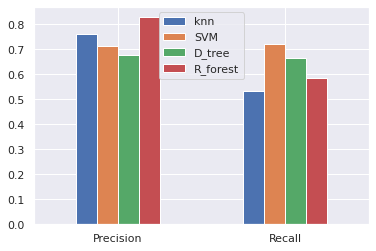

In [129]:
compare_.plot.bar(rot=0)

In [130]:
pd.Series(index=feat, data=forest_model.feature_importances_).sort_values(ascending=False) #forest

lead_time                  0.093334
deposit_type_No Deposit    0.066927
deposit_type_Non Refund    0.066359
country_PRT                0.065557
adr                        0.062802
                             ...   
country_SMR                0.000000
country_SLE                0.000000
country_FRO                0.000000
country_FJI                0.000000
country_MWI                0.000000
Length: 247, dtype: float64

In [89]:
pd.Series(index=feat, data=tree_model.feature_importances_).sort_values(ascending=False)[10]  # tree

NameError: name 'feat' is not defined